<a href="https://colab.research.google.com/github/ashis003/Machine-Learning/blob/main/MultiLinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

%matplotlib inline

In [ ]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Axes: xlabel='Newspaper', ylabel='Sales'>

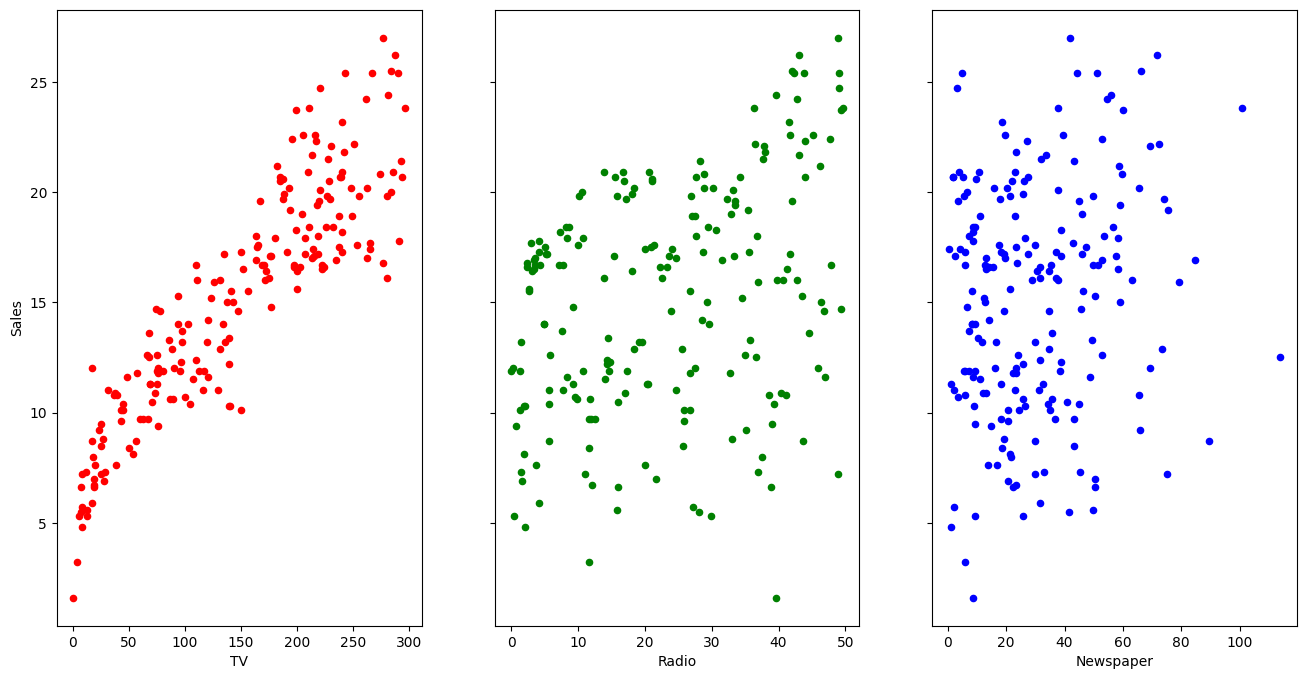

In [ ]:
fig,axs=plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='TV',y='Sales',c='red',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='Radio',y='Sales',c='green',ax=axs[1],figsize=(16,8))
df.plot(kind='scatter',x='Newspaper',y='Sales',c='blue',ax=axs[2],figsize=(16,8))

In [ ]:
feature_cols = ['TV','Radio','Newspaper']
X = df[feature_cols]
y = df.Sales

from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)


print(lm.intercept_)
print(lm.coef_)


4.625124078808653
[0.05444578 0.10700123 0.00033566]


In [ ]:
lm.fit(xtrain,ytrain)

print(lm.intercept_)
print(lm.coef_)

pred = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest,pred)))



4.743766701589685
[0.05358869 0.10270677 0.00793167]
1.5942471691143587


In [ ]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper',data=df).fit()

In [ ]:
lm.rsquared

0.9025912899684558

In [ ]:
lm.pvalues

Intercept    1.682677e-34
TV           1.892945e-95
Radio        4.602097e-27
Newspaper    9.538145e-01
dtype: float64

In [ ]:
lm.conf_int()

,0,1
Intercept,4.018688,5.231560
TV,0.051734,0.057158
Radio,0.090259,0.123744
Newspaper,-0.011079,0.011751


In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           8.13e-99
Time:                        19:25:31   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""